Prática - Limpeza e Tratamento de Dados

Informações sobre o conjunto de dados:
- Aparência = Sol, Nublado, Chuva
- Temperatura -130 ~ 130 °F
- Umidade: 0 a 100
- Jogar: Sim/Não

In [2]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [3]:
#importando dados
dataset = pd.read_csv("tempo.csv", sep=";")
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [4]:
#verificando tamanho do dadaset
dataset.shape

(14, 5)

Explorando os dados:

In [5]:
#explorando dados
#aparência
aparencia = dataset.groupby(['Aparencia']).size()
aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

#OBSERVAÇÃO: verifica-se uma característica (menos) fora do domínio 

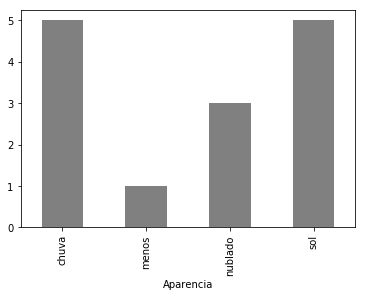

In [10]:
#plotando os dados para melhor visualização
aparencia.plot.bar(color = 'gray')

In [11]:
#explorando dados
#temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

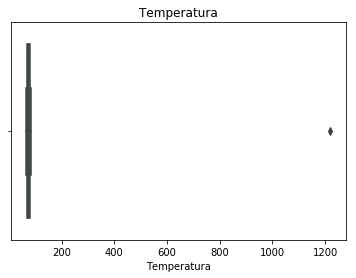

In [12]:
#plotando boxplot
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Temperatura')

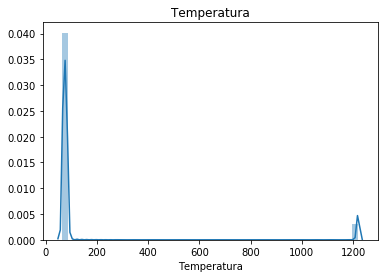

In [13]:
#plotando gráfico de distribuição
srn.distplot(dataset['Temperatura']).set_title('Temperatura')

OBSERVAÇÃO: verifica-se que alguns pontos de Temperatura extrapolam o intervalo (intervalo = -130 a 130°F)

In [15]:
#explorando dados
#umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

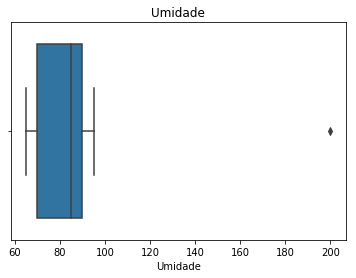

In [16]:
#plotando boxplot
srn.boxplot(dataset['Umidade']).set_title('Umidade')

OBSERVAÇÃO: verifica-se que alguns pontos de Umidade extrapolam o intervalo (intervalo = 0 a 100)

In [19]:
#buscando valores NaN
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

Tratando os dados

In [20]:
#tratando os dados
#os valores NaN encontrados na coluna "Umidade" podem ser substituídos pela mediana
mediana = sts.median(dataset['Umidade'])
dataset['Umidade'].fillna(mediana, inplace = True)
dataset['Umidade'].isnull().sum()

0

In [22]:
#tratando os dados
#os valores NaN encontrados na coluna "Vento" podem ser substituídos pela moda (moda = Masculino)
#verificando qual a moda
vento = dataset.groupby(['Vento']).size()
vento
#fazendo as substituições
dataset['Vento'].fillna('FALSO', inplace = True)
dataset['Vento'].isnull().sum()

0

In [35]:
#testando se ainda existem valores NaN
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [38]:
#tratando os dados
#verificando uma Aparencia fora do domínio e substituindo-a pela moda
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = "sol"
dataset.loc[dataset['Aparencia'] == 'Sol', 'Aparencia'] = "sol"

aparencia2 = dataset.groupby(['Aparencia']).size()
aparencia2 

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [41]:
#tratando os dados
#verificando as temperaturas fora de domínio e substituindo-as pela mediana das temperaturas

dataset.loc[(dataset['Temperatura'] < (-130)) | (dataset['Temperatura'] > 130)] #verificação

mediana2 = sts.median(dataset['Temperatura'])
dataset.loc[(dataset['Temperatura'] < (-130)) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana2
dataset.loc[(dataset['Temperatura'] < (-130)) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [43]:
#tratando os dados
#verificando as umidades fora de domínio e substituindo-as pela mediana das umidades

dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)] #verificação

mediana3 = sts.median(dataset['Umidade'])
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = mediana3
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [44]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
